# Portfolio optimization (commodities)

Developed and evaluated portfolio optimization strategies using daily commodity price data. 

Applied financial metrics like Sharpe, Calmar, and Sortino ratios to assess performance. 

Implemented rolling-window backtesting with optimization methods including Risk Parity, Minimum Volatility, and Maximum Sharpe Ratio. 

Visualized cumulative returns and drawdowns, and deployed robust model evaluation and portfolio rebalancing logic using Python.

In [16]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, MultipleLocator
import matplotlib.dates as mdates

In [17]:
from module import *

## Load and preprocess the data

In [18]:
# Define stock tickers and date range
tickers = ['ES=F', 'ZN=F', 'GC=F', 'CL=F', 'ZW=F', 'DX=F']
start_date = "2015-04-07"
end_date = "2025-04-07"
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)['Close']

[*********************100%***********************]  6 of 6 completed


In [19]:
# Check NaN
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2015-04-07 to 2025-04-04
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CL=F    2515 non-null   float64
 1   DX=F    2516 non-null   float64
 2   ES=F    2516 non-null   float64
 3   GC=F    2514 non-null   float64
 4   ZN=F    2515 non-null   float64
 5   ZW=F    2515 non-null   float64
dtypes: float64(6)
memory usage: 137.6 KB


In [20]:
# fill NaMs with the previous value
data = data.ffill()

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2015-04-07 to 2025-04-04
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CL=F    2516 non-null   float64
 1   DX=F    2516 non-null   float64
 2   ES=F    2516 non-null   float64
 3   GC=F    2516 non-null   float64
 4   ZN=F    2516 non-null   float64
 5   ZW=F    2516 non-null   float64
dtypes: float64(6)
memory usage: 137.6 KB


In [22]:
# Rename the columns

# Define the new commodity names
commodity_names = [
    'sp500',  # Corresponds to 'ES=F'
    '10y_us_tres',  # Corresponds to 'ZN=F'
    'gold',  # Corresponds to 'GC=F'
    'oil',  # Corresponds to 'CL=F'
    'wheat',  # Corresponds to 'ZW=F'
    'us_dollar',  # Corresponds to 'DX=F'
    
]

# Create a dictionary mapping old column names to new names
rename_dict = dict(zip(tickers, commodity_names))

# Rename the columns
data = data.rename(columns=rename_dict)

In [23]:
data.head()

Ticker,oil,us_dollar,sp500,gold,10y_us_tres,wheat
Date,,,,,,
2015-04-07,53.980000,98.056000,2067.75,1210.599976,129.359375,526.00
2015-04-08,50.419998,98.130997,2076.00,1203.099976,129.359375,526.25
2015-04-09,50.790001,99.394997,2085.75,1193.599976,128.843750,518.75
2015-04-10,51.639999,99.596001,2095.50,1204.599976,128.812500,526.50
2015-04-13,51.910000,99.767998,2086.50,1199.300049,128.984375,502.25


In [24]:
# Calculate log returns
log_returns = np.log(data / data.shift(1)).dropna()

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [25]:
log_returns.head()

Ticker,oil,us_dollar,sp500,gold,10y_us_tres,wheat
Date,,,,,,
2015-04-08,-0.068226,0.000765,0.003982,-0.006215,0.000000,0.000475
2015-04-09,0.007312,0.012798,0.004686,-0.007928,-0.003994,-0.014354
2015-04-10,0.016597,0.002020,0.004664,0.009174,-0.000243,0.014829
2015-04-13,0.005215,0.001725,-0.004304,-0.004409,0.001333,-0.047153
2015-04-14,0.026237,-0.008334,0.002154,-0.005435,0.002541,-0.010508


## Apply portfolio optimization functions with the rolling window of 252 days (1 year)

### Max SR strategy

In [26]:
# Calculate portfolio returns
portfolio_returns = rolling_window_portfolio(log_returns, opt_function = max_sharpe_ratio, window_size=252, step_size=1)

In [27]:
# Evaluate the portfolio
calculate_metrics(portfolio_returns)

Max Drawdown: -0.11922303480421205
Annualized Return: 0.03407647648481453
Annualized Volatility: 0.06983423103617144
Sharpe Ratio: 0.4879623642904327
Calmar Ratio: 0.28582124704990847
Sortino Ratio: 0.4381256545781157


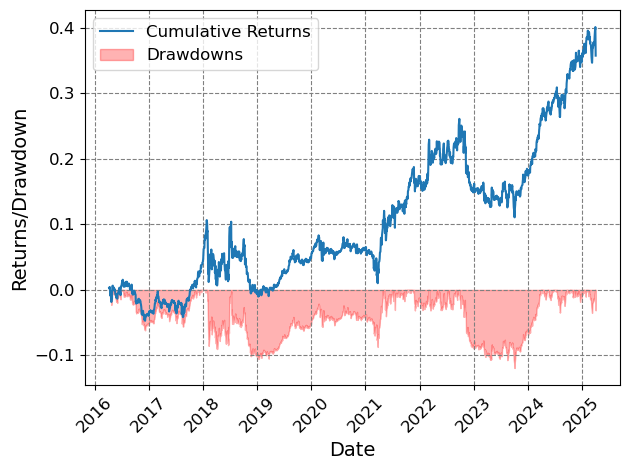

In [28]:
# Plot cum ret
plot_cumulative_returns_and_drawdowns(portfolio_returns, 0.1)

### Equal weights strategy

In [29]:
portfolio_returns = rolling_window_portfolio(log_returns, opt_function = equal_weight, window_size=252, step_size=1)

In [30]:
# Evaluate the portfolio
calculate_metrics(portfolio_returns)

Max Drawdown: -0.22438666254250172
Annualized Return: 0.05578059340381152
Annualized Volatility: 0.11175454344593748
Sharpe Ratio: 0.49913490479960676
Calmar Ratio: 0.2485913947458707
Sortino Ratio: 0.4928176062290311


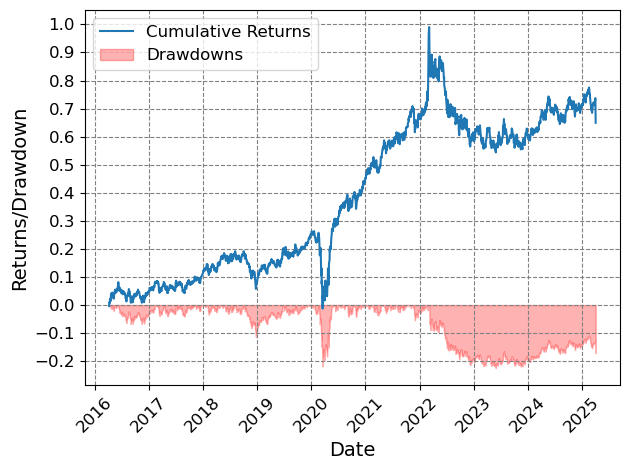

In [31]:
# Plot cum ret
plot_cumulative_returns_and_drawdowns(portfolio_returns, 0.1)

### Risk parity strategy

In [32]:
portfolio_returns = rolling_window_portfolio(log_returns, opt_function = risk_parity, window_size=252, step_size=1)

In [33]:
# Evaluate the portfolio
calculate_metrics(portfolio_returns)

Max Drawdown: -0.09914671040918813
Annualized Return: 0.02464266894313418
Annualized Volatility: 0.045114239176960856
Sharpe Ratio: 0.5462281841099696
Calmar Ratio: 0.24854751954383042
Sortino Ratio: 0.5340417303238734


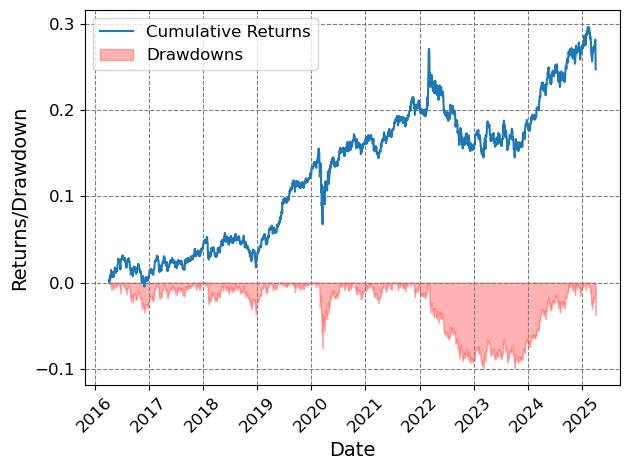

In [34]:
# Plot cum ret
plot_cumulative_returns_and_drawdowns(portfolio_returns, 0.1)

### Minimum volatility strategy

In [35]:
portfolio_returns = rolling_window_portfolio(log_returns, opt_function = minimum_volatility, window_size=252, step_size=1)

In [36]:
# Evaluate the portfolio
calculate_metrics(portfolio_returns)

Max Drawdown: -0.05782660340563099
Annualized Return: 0.012960494528065528
Annualized Volatility: 0.030419634754481152
Sharpe Ratio: 0.42605687519493646
Calmar Ratio: 0.22412685104730656
Sortino Ratio: 0.42816507034048207


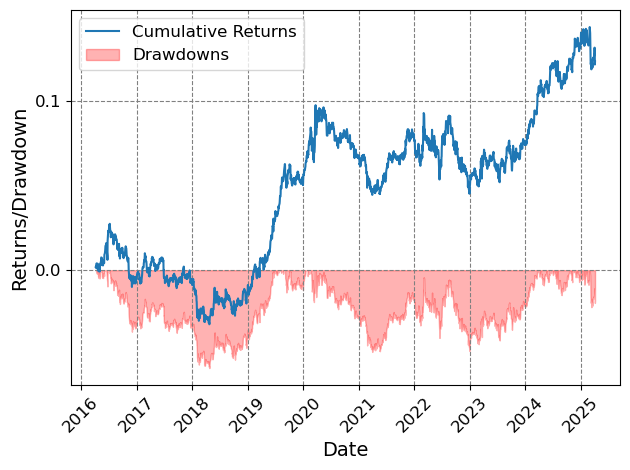

In [37]:
# Plot cumulative returns and drawdowns
plot_cumulative_returns_and_drawdowns(portfolio_returns, 0.1)